# Python Aufgabe 

In [1]:
import urllib.request
import pandas as pd

### Checkout Daten 2020 über API beziehen und als csv-Datei speichern

In [2]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2020&$limit=10000"
checkout_file = "checkout_2020.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout_2020.csv', <http.client.HTTPMessage at 0x7fe0013dc400>)

### DataFrame

In [3]:
checkout_df = pd.read_csv(checkout_file)

In [4]:
checkout_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2020,8,1,Harvest / Sam Inglis.,NaN,"Inglis, Sam",Young Neil 1945 Harvest,"Continuum,",2003.
1,Digital,OverDrive,EBOOK,2020,8,1,The Race Beat,NaN,Gene Roberts,"History, Nonfiction, Politics, Sociology","Random House, Inc.",2008
2,Digital,OverDrive,EBOOK,2020,8,5,I Can Cook Vegan,NaN,Isa Chandra Moskowitz,"Cooking & Food, Nonfiction",ABRAMS,2019
3,Digital,OverDrive,EBOOK,2020,8,1,Follow the Stars Home,NaN,Luanne Rice,"Fiction, Romance","Random House, Inc.",2012
4,Digital,OverDrive,EBOOK,2020,8,1,Blood of Innocence,NaN,Tami Dane,"Fantasy, Fiction, Romance",Lightning Source Inc,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2020,1,3,Bicycle mystery / Gertrude Chandler Warner ; i...,NaN,"Warner, Gertrude Chandler, 1890-1979",Boxcar children Fictitious characters Juvenile...,"Albert Whitman,",[1970]
9996,Physical,Horizon,VIDEODISC,2020,1,9,The warrior tradition / CPB ; a co-production ...,NaN,NaN,"United States Armed Forces Indians, Indians of...","PBS,",[2019]
9997,Digital,OverDrive,EBOOK,2020,1,1,How Come?: Every Kid's Science Questions Expla...,NaN,Kathy Wollard,"Juvenile Nonfiction, Science, Technology",Workman Publishing,2015
9998,Digital,OverDrive,EBOOK,2020,1,7,A Spool of Blue Thread: A Novel,NaN,Anne Tyler,"Fiction, Literature","Random House, Inc.",2015


### Überblick über die Daten

In [5]:
checkout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   usageclass       10000 non-null  object 
 1   checkouttype     10000 non-null  object 
 2   materialtype     10000 non-null  object 
 3   checkoutyear     10000 non-null  int64  
 4   checkoutmonth    10000 non-null  int64  
 5   checkouts        10000 non-null  int64  
 6   title            10000 non-null  object 
 7   isbn             0 non-null      float64
 8   creator          8853 non-null   object 
 9   subjects         9944 non-null   object 
 10  publisher        9989 non-null   object 
 11  publicationyear  9987 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


In [6]:
checkout_df.shape

(10000, 12)

In [7]:
checkout_df["checkoutmonth"].max()

10

In [8]:
checkout_df["checkoutmonth"].min()

1

In [9]:
checkout_df["checkouts"].max()

546

In [10]:
checkout_df["checkouts"].min()

1

In [11]:
checkout_df["checkouts"].median()

2.0

In [12]:
checkout_df["usageclass"].unique()

array(['Physical', 'Digital'], dtype=object)

In [13]:
checkout_df["materialtype"].unique()

array(['BOOK', 'EBOOK', 'AUDIOBOOK', 'SOUNDDISC', 'CR', 'VIDEO',
       'VIDEODISC', 'ER, SOUNDDISC', 'MUSIC', 'LARGEPRINT', 'REGPRINT',
       'SOUNDDISC, VIDEODISC', 'VISUAL', 'ER'], dtype=object)

checkout_df["materialtype"].value_counts()

In [14]:
checkout_df[checkout_df["materialtype"] == "LARGEPRINT"]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
1173,Physical,Horizon,LARGEPRINT,2020,1,1,How secrets die : house of secrets / Marta Perry.,NaN,"Perry, Marta","Amish Fiction, Reporters and reporting Fiction...","Center Point Large Print,",2019.
4939,Physical,Horizon,LARGEPRINT,2020,1,1,The never game / Jeffery Deaver.,NaN,"Deaver, Jeffery","Private investigators Fiction, Missing persons...","Thorndike Press, a part of Gale, a Cengage Com...",2019.
8869,Physical,Horizon,LARGEPRINT,2020,1,2,Juror #3 / James Patterson and Nancy Allen.,NaN,"Patterson, James, 1947-","Women lawyers Fiction, Trials Murder Fiction, ...","Little Brown & Company,",2018.


### Frage 1: Wie häufig wurde welcher Medientyp entliehen?

In [15]:
checkout_df["materialtype"].value_counts()

BOOK                    4537
EBOOK                   2654
AUDIOBOOK               1177
VIDEODISC                834
SOUNDDISC                736
REGPRINT                  22
MUSIC                     17
VIDEO                      7
SOUNDDISC, VIDEODISC       6
CR                         4
LARGEPRINT                 3
ER, SOUNDDISC              1
VISUAL                     1
ER                         1
Name: materialtype, dtype: int64

<AxesSubplot:>

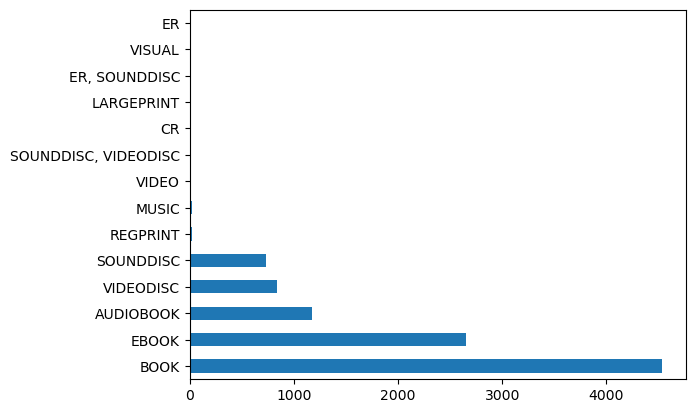

In [16]:
checkout_df["materialtype"].value_counts().plot(kind="barh")

<AxesSubplot:ylabel='materialtype'>

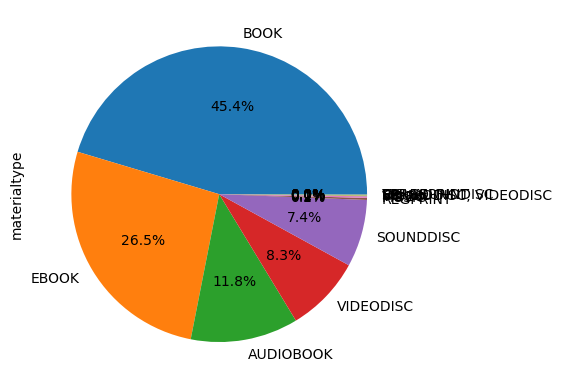

In [44]:
checkout_df["materialtype"].value_counts().plot(kind="pie", autopct='%1.1f%%')

### Frage 2: In welchem Monat gab es wie viele Entleihungen?

In [54]:
checkout_df["checkoutmonth"].value_counts().sort_index()

1     9737
2       10
3        6
4       71
5      123
8       46
9        5
10       2
Name: checkoutmonth, dtype: int64

<AxesSubplot:>

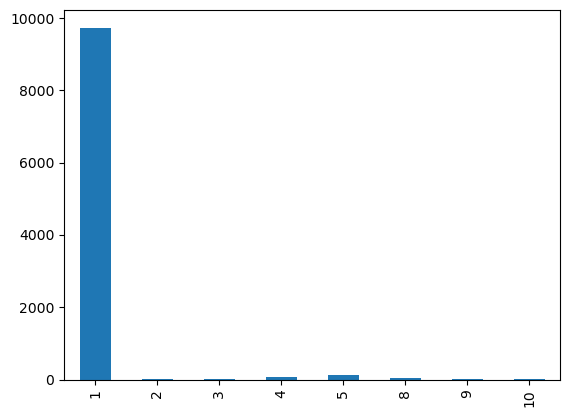

In [55]:
checkout_df["checkoutmonth"].value_counts().sort_index().plot(kind="bar")

### Frage 3: Welches Hörbuch wurde am häufigsten entliehen? 

In [62]:
checkout_df[checkout_df["materialtype"] == "AUDIOBOOK"]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
8,Digital,OverDrive,AUDIOBOOK,2020,8,1,Tales of Terror (Unabridged),NaN,Edgar Allan Poe,"Fiction, Mystery","Blackstone Audio, Inc.",2006
19,Digital,OverDrive,AUDIOBOOK,2020,8,3,Huckleberry Finn (Unabridged),NaN,Mark Twain,"Drama, Fiction",Random House Group Limited,2009
36,Digital,OverDrive,AUDIOBOOK,2020,8,1,The EARTH Book (Unabridged),NaN,Todd Parr,"Juvenile Nonfiction, Nature",Hachette Audio,2015
42,Digital,OverDrive,AUDIOBOOK,2020,8,1,Emerald Windows (Unabridged),NaN,Terri Blackstock,"Fiction, Literature",Zondervan,2013
55,Digital,OverDrive,AUDIOBOOK,2020,5,1,The New York Stories (Unabridged),NaN,John O'Hara,"Fiction, Literature",Books on Tape,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
9948,Digital,OverDrive,AUDIOBOOK,2020,1,3,The Known World (Unabridged),NaN,Edward P. Jones,"African American Fiction, Fiction, Historical ...",HarperCollins Publishers Inc.,2005
9950,Digital,OverDrive,AUDIOBOOK,2020,1,44,"Option B: Facing Adversity, Building Resilienc...",NaN,Sheryl Sandberg,"Biography & Autobiography, Business, Family & ...",Books on Tape,2017
9951,Digital,OverDrive,AUDIOBOOK,2020,1,36,"Buy It, Rent It, Profit!: Make Money as a Land...",NaN,Bryan M. Chavis,"Business, Finance, Law, Nonfiction","Tantor Media, Inc",2017
9968,Digital,OverDrive,AUDIOBOOK,2020,1,1,"Someone Comes to Town, Someone Leaves Town (Un...",NaN,Cory Doctorow,"Fantasy, Fiction, Science Fiction","Blackstone Audio, Inc.",2015


In [67]:
checkout_df[checkout_df["materialtype"] == "AUDIOBOOK"].sort_values("checkouts").max()

usageclass                                                   Digital
checkouttype                                               OverDrive
materialtype                                               AUDIOBOOK
checkoutyear                                                    2020
checkoutmonth                                                      8
checkouts                                                        114
title              Zoom: From Atoms and Galaxies to Blizzards and...
isbn                                                             NaN
creator                                              don Miguel Ruiz
subjects                                      Young Adult Nonfiction
publisher                                                  Zondervan
publicationyear                                                 2020
dtype: object